# Introduction to Machine Learning, UZH 2018, Group Project
### Group 2: Barbara Capl, Mathias Lüthi, Pamela Matias, Stefanie Rentsch
##       
# 2. Feature Selection with RandomForestClassifier

In this section we use the feature matrices and the response vector that we prepared in chapter 1.  

#### We use two different versions (created in chapter 1):
Version 1: Feature Matrix consists only of the Ratios                                                                        
Version 2: Feature Matrix consists of Ratios + dummy variables for seasonality + other market data
####   


In [12]:
# hide unnecessary warnings ("depreciation" of packages etc.)
import warnings
warnings.filterwarnings('ignore')

# import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Imputer
from sklearn.ensemble import RandomForestClassifier

## 2.1. Preparation

### 2.1.1 Import the Response Vector and the Feature Matrices

In [13]:
# Load in the response vector 
y = pd.read_csv('Data/generated_datasets/response_1.csv', sep=',', header=0)

#### => Choose which Feature Matrix (Version 1 or 2) you want to load in by uncommenting it

! ! ! Before changing the feature matrix below you also need to change the saving path in section 2.2.3. so you don't overwrite the results of the first used feature matrix.



In [3]:
### Version 1: only ratios (including permno code + date) as predictive features
X = pd.read_csv('Data/generated_datasets/features_ratios_1.csv', sep=',', header=0)

### Version 2: ratios (including permno code + date) + seasonality + other market data
#X = pd.read_csv('Data/generated_datasets/features_additional_1.csv', sep=',', header=0)

### 2.1.2. Train/ Test Split and fill missing values with mean

Standardization is not done because it is not necessary for Random Forest.

### Train/ Test Split

In [17]:
# Train/test split, into 20% test size and 80% train size because it is a relatively small dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Save the response vector after split
y_train.to_csv('Data/generated_splits/y_train')
y_test.to_csv('Data/generated_splits/y_train')

# Extract the feature labels
feature_labels = list(X)
print('Type of feature_labels = ' + str(type(feature_labels)))
print("")



Type of feature_labels = <class 'list'>



### Fill missing values

In [16]:
# Use a mean fill for train
imp = Imputer(missing_values=np.nan, strategy = 'mean' , axis=0)
imputed_dataset = pd.DataFrame(imp.fit_transform(X_train))
imputed_dataset.columns = X_train.columns
imputed_dataset.index = X_train.index
X_train = imputed_dataset

# Use a mean fill for the test set
imputed_dataset = pd.DataFrame(imp.fit_transform(X_test))
imputed_dataset.columns = X_test.columns
imputed_dataset.index = X_test.index
X_test = imputed_dataset

### 2.2.3. Print out Shape and Form of Feature Matrix and Response Vector

### Train set

In [5]:
print('Shape of Feature Matrix X_train = ' + str(X_train.shape))
print("")
print('Feature Matrix X_train')
display(X_train.head())
print("")
print('Response Vector y_train')
display(y_train.head())
print("")

# Check if there is the approximately same percentage of '1' the train response vector
print('Ratio of "Ones" (Train)  =  ' + str(y_train.sum() / y_train.size))

Shape of Feature Matrix X_train = (2836, 71)

Feature Matrix X_train


,CAPEI,bm,evm,pe_op_basic,pe_op_dil,pe_exi,pe_inc,ps,pcf,dpr,...,sale_nwc,rd_sale,adv_sale,staff_sale,accrual,ptb,PEG_trailing,divyield,PEG_1yrforward,PEG_ltgforward
1530,20.773,0.547,10.644,15.468,15.633,18.484,18.484,3.703,9.957,0.623,...,1.4240,0.136,0.058,0.000,0.048,1.811,1.181,0.0354,13.678,5.963
1397,25.089,0.461,9.246,17.203,17.296,39.232,39.232,0.689,8.509,2.175,...,4.9910,0.031,0.000,0.000,0.047,2.189,0.668,0.0398,1.521,5.702
2238,12.337,0.911,12.474,9.135,9.209,13.062,13.062,2.034,1.993,0.337,...,5.8105,0.000,0.024,0.291,0.038,1.076,3.048,0.0268,0.380,2.248
3170,14.924,0.474,10.373,15.292,15.411,17.287,17.287,2.449,9.965,0.155,...,1.1490,0.132,0.008,0.000,0.052,2.269,0.980,0.0121,1.334,2.020
2244,12.689,0.964,13.526,10.430,10.504,15.362,15.362,2.181,7.512,0.516,...,5.8105,0.000,0.024,0.291,0.006,1.071,0.980,0.0269,0.645,3.414



Response Vector y_train


,0
1530,1
1397,0
2238,1
3170,1
2244,1



Ratio of "Ones" (Train)  =  0    0.559238
dtype: float64


### Test set

In [6]:
print('Shape of Feature Matrix X_test = ' + str(X_test.shape))
print("")
print('Feature Matrix X_test')
display(X_test.head())
print("")
print('Response Vector y_test')
display(y_test.head())
print("")

# Check if there is the approximately same percentage of '1' in the test response vector
print('Ratio of "Ones" (Test)  =  ' + str(y_test.sum() / y_test.size))

Shape of Feature Matrix X_test = (710, 71)

Feature Matrix X_test


,CAPEI,bm,evm,pe_op_basic,pe_op_dil,pe_exi,pe_inc,ps,pcf,dpr,...,sale_nwc,rd_sale,adv_sale,staff_sale,accrual,ptb,PEG_trailing,divyield,PEG_1yrforward,PEG_ltgforward
817,20.983,0.254,8.585,16.127,16.224,16.224,16.224,3.318,10.484,0.287,...,6.768,0.031,0.006,0.000,0.084,4.189,1.022,0.0187,1.414,1.330
2592,21.663,0.235,13.619,16.311,16.489,18.555,18.555,2.379,7.709,0.199,...,7.169,0.000,0.000,0.195,0.039,4.281,1.147,0.0122,1.737,1.572
1475,16.327,0.513,6.716,9.520,9.520,15.681,15.550,3.293,8.490,0.792,...,1.286,0.162,0.054,0.000,0.077,2.198,1.022,0.0343,-0.973,6.149
1826,12.178,0.347,10.118,9.094,9.122,10.795,10.795,2.703,13.306,0.550,...,3.059,0.211,0.000,0.000,-0.025,3.235,1.199,0.0506,-1.678,6.623
599,18.039,0.596,4.676,8.729,8.790,8.790,8.790,0.695,6.216,0.255,...,18.561,0.002,0.000,0.000,0.059,1.797,0.123,0.0335,0.523,1.336



Response Vector y_test


,0
817,0
2592,1
1475,1
1826,1
599,1



Ratio of "Ones" (Test)  =  0    0.567606
dtype: float64


###    
## 2.2. Selecting & Extracting Features

### 2.2.1.  Fit forest and show list of best 'n' features according to explanatory value

# ===> MATHIAS LOOP FOR RUNNING THE CODE WITH  random_state 0 to 10 and then select best n features

In [7]:
forest = RandomForestClassifier(random_state = 0)
forest.max_depth = 6
forest.fit(X_train, y_train)

# Check features for their importance for the prediction
feature_importances = forest.feature_importances_

# sort features in line with their importance for the prediction
indices = np.argsort(feature_importances)[::-1]

# print best n features
n = 15
for i in range(n):
    print('{0:2d} {1:7s} {2:6.4f}'.format(i + 1, feature_labels[indices[i]], 
                                          feature_importances[indices[i]]))
del i

 1 CAPEI   0.0731
 2 pcf     0.0433
 3 divyield 0.0413
 4 evm     0.0410
 5 pe_inc  0.0357
 6 pe_op_dil 0.0347
 7 pe_op_basic 0.0325
 8 bm      0.0324
 9 PEG_ltgforward 0.0291
10 ptb     0.0256
11 aftret_equity 0.0245
12 sale_invcap 0.0210
13 PEG_1yrforward 0.0195
14 pe_exi  0.0193
15 debt_assets 0.0187


### 2.2.2.  Plotting results

TypeError: only integer scalar arrays can be converted to a scalar index

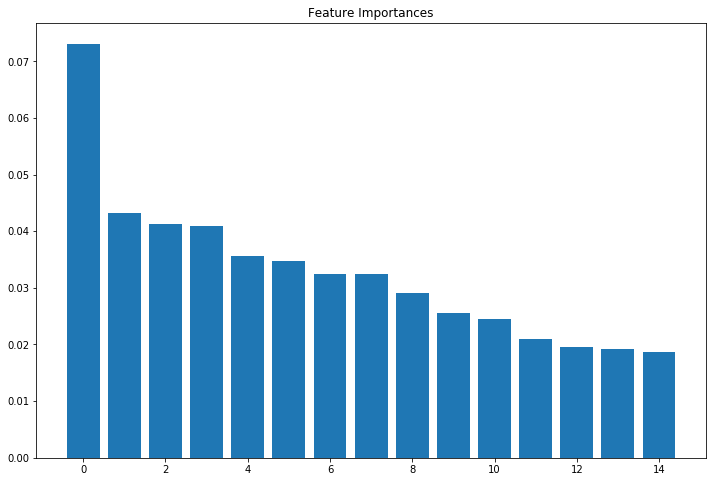

In [8]:
# Get cumsum of the n most important features
feat_imp = np.sort(feature_importances)[::-1]
sum_feat_imp = np.cumsum(feature_importances)[:n]

# Plot Feature Importance (both cumulative and individual)
plt.figure(figsize = (12, 8))
plt.title('Feature Importances')
plt.bar(range(n), feature_importances[indices[:n]], align = 'center')
plt.xticks(range(n), feature_labels[indices[:n]], rotation = 90)
plt.xlim([-1, n])
plt.xlabel('Feature')
plt.ylabel('Relative Feature Importance')
plt.step(range(n), sum_feat_imp, where = 'mid', label = 'Cumulative Feature Importance')
plt.tight_layout();

### 2.2.3. Extract best 'n' Variables and save into new Feature Matrices


In [9]:
#from sklearn.feature_selection import SelectFromModel

#selected_1 = SelectFromModel(RandomForestClassifier(), threshold = 'median')
#selected_1.fit(X1, y1)
#n_features = selected_1.transform(X1).shape[1]
#X1.head()

# =====> AUTOMATED FEATURE EXTRACTION WOULD BE EXTREEEMELY COOL
# =====> SELECTFROMMODEL ALGO CAN ONLY SELECT FEATURES ACCORDING TO THRESHOLD, NOT "BET N FEATURES" (?)

### Extract

In [10]:
# Extract only the n best variables directly from the feature matrix into a new one
X_train_s = X_train[['CAPEI', 'pcf', 'divyield', 'evm', 'pe_inc', 'pe_op_dil', 'pe_op_basic', 'bm', 'PEG_ltgforward',
                     'ptb', 'aftret_equity', 'sale_invcap', 'PEG_1yrforward', 'pe_exi', 'debt_assets']]
X_test_s = X_test[['CAPEI', 'pcf', 'divyield', 'evm', 'pe_inc', 'pe_op_dil', 'pe_op_basic', 'bm', 'PEG_ltgforward',
                     'ptb', 'aftret_equity', 'sale_invcap', 'PEG_1yrforward', 'pe_exi', 'debt_assets']]
feature_labels_s = X_train_s.columns[:-1]

print("")
print('Feature Matrix with selected Features (Train)')
display(X_train_s.head())
print("")
print('Feature Matrix with selected Features (Test)')
display(X_test_s.head())
print("")


Feature Matrix with selected Features (Train)


,CAPEI,pcf,divyield,evm,pe_inc,pe_op_dil,pe_op_basic,bm,PEG_ltgforward,ptb,aftret_equity,sale_invcap,PEG_1yrforward,pe_exi,debt_assets
1530,20.773,9.957,0.0354,10.644,18.484,15.633,15.468,0.547,5.963,1.811,0.134,0.466,13.678,18.484,0.552
1397,25.089,8.509,0.0398,9.246,39.232,17.296,17.203,0.461,5.702,2.189,0.058,1.337,1.521,39.232,0.662
2238,12.337,1.993,0.0268,12.474,13.062,9.209,9.135,0.911,2.248,1.076,0.086,0.229,0.380,13.062,0.913
3170,14.924,9.965,0.0121,10.373,17.287,15.411,15.292,0.474,2.020,2.269,0.137,0.705,1.334,17.287,0.451
2244,12.689,7.512,0.0269,13.526,15.362,10.504,10.430,0.964,3.414,1.071,0.076,0.203,0.645,15.362,0.912



Feature Matrix with selected Features (Test)


,CAPEI,pcf,divyield,evm,pe_inc,pe_op_dil,pe_op_basic,bm,PEG_ltgforward,ptb,aftret_equity,sale_invcap,PEG_1yrforward,pe_exi,debt_assets
817,20.983,10.484,0.0187,8.585,16.224,16.224,16.127,0.254,1.330,4.189,0.310,1.241,1.414,16.224,0.426
2592,21.663,7.709,0.0122,13.619,18.555,16.489,16.311,0.235,1.572,4.281,0.238,0.473,1.737,18.555,0.875
1475,16.327,8.490,0.0343,6.716,15.550,9.520,9.520,0.513,6.149,2.198,0.130,0.536,-0.973,15.681,0.519
1826,12.178,13.306,0.0506,10.118,10.795,9.122,9.094,0.347,6.623,3.235,0.304,0.904,-1.678,10.795,0.537
599,18.039,6.216,0.0335,4.676,8.790,8.790,8.729,0.596,1.336,1.797,0.283,2.786,0.523,8.790,0.504


### Save

#### => Choose which Feature Matrix (Version 1 or 2) and labels you want to save in by uncommenting the code

! ! ! Before changing the feature matrix above in section 2.1.1. you also need to change the saving path here in section 2.2.3. so you don't overwrite the results of the first used feature matrix.



In [15]:
### Version 1: only ratios (including permno code + date) as predictive features
X_train_s.to_csv('Data/generated_splits/X1_train_s.csv')
X_test_s.to_csv('Data/generated_splits/X1_test_s.csv')
#feature_labels_s.to_csv('Data/generated_splits/feature1_labels_s.csv')

### Version 2: ratios (including permno code + date) + seasonality + other market data
#X_train_s.to_csv('Data/generated_splits/X2_train_s.csv')
#X_test_s.to_csv('Data/generated_splits/X2_test_s.csv')
#feature_labels_s.to_csv('Data/generated_splits/feature2_labels_s.csv')